### Task1

#### i) import the required libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.cluster import KMeans

In [9]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

#### ii) treating the data set

In [11]:
veh_df=pd.read_csv('DS1_C9_S6_Practice_Vehicle_Data.csv')
veh_df

,Manufacturer,Model,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,Passenger,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150
1,Acura,TL,Passenger,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778
2,Acura,CL,Passenger,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN
3,Acura,RL,Passenger,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779
4,Audi,A4,Passenger,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,Passenger,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,Passenger,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,Passenger,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,Passenger,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [15]:
veh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Manufacturer       157 non-null    object 
 1   Model              157 non-null    object 
 2   Vehicle_type       157 non-null    object 
 3   Engine_size        156 non-null    float64
 4   Horsepower         156 non-null    float64
 5   Wheelbase          156 non-null    float64
 6   Width              156 non-null    float64
 7   Length             156 non-null    float64
 8   Curb_weight        155 non-null    float64
 9   Fuel_capacity      156 non-null    float64
 10  Fuel_efficiency    154 non-null    float64
 11  Latest_Launch      157 non-null    object 
 12  Power_perf_factor  155 non-null    float64
dtypes: float64(9), object(4)
memory usage: 16.1+ KB


In [17]:
# seperate numerical columns
vhcl_df=veh_df.select_dtypes(exclude='object')
vhcl_df

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...
152,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


In [19]:
# a) Missing value treatment
vhcl_df.isnull().sum()

Engine_size          1
Horsepower           1
Wheelbase            1
Width                1
Length               1
Curb_weight          2
Fuel_capacity        1
Fuel_efficiency      3
Power_perf_factor    2
dtype: int64

In [21]:
for col in vhcl_df.columns:
    vhcl_df[col]=vhcl_df[col].fillna(vhcl_df[col].mean())

vhcl_df.isnull().sum()

Engine_size          0
Horsepower           0
Wheelbase            0
Width                0
Length               0
Curb_weight          0
Fuel_capacity        0
Fuel_efficiency      0
Power_perf_factor    0
dtype: int64

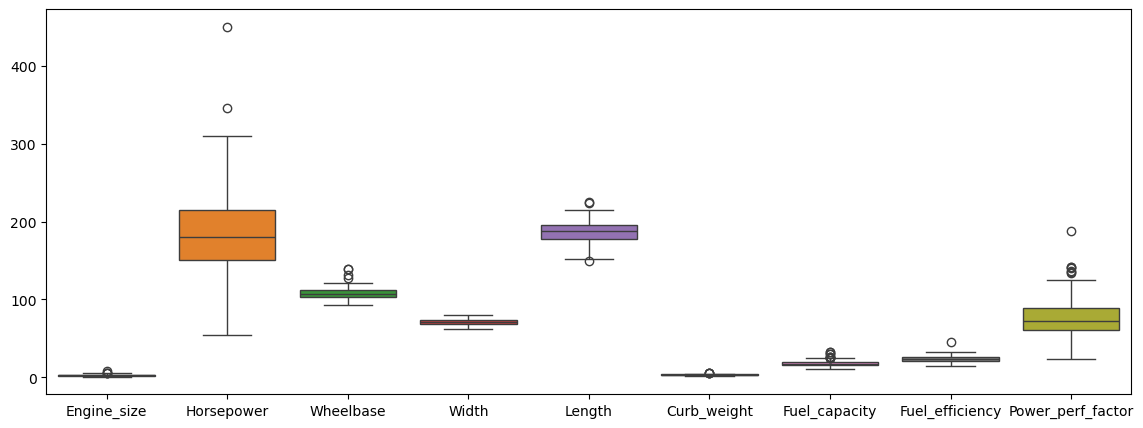

In [23]:
# b) outlier treatment
sns.boxplot(data=vhcl_df)
plt.gcf().set_size_inches(14,5)
plt.show()

In [25]:
for col in vhcl_df.columns:
    ser=pd.Series(vhcl_df[col])
    q1=ser.quantile(0.25)
    q3=ser.quantile(0.75)
    iqr=q3-q1
    upp=q3+1.5*iqr
    low=q1-1.5*iqr
    for z in ser:
        vhcl_df.loc[vhcl_df[col]>upp,col]=upp
        vhcl_df.loc[vhcl_df[col]<low,col]=low
    

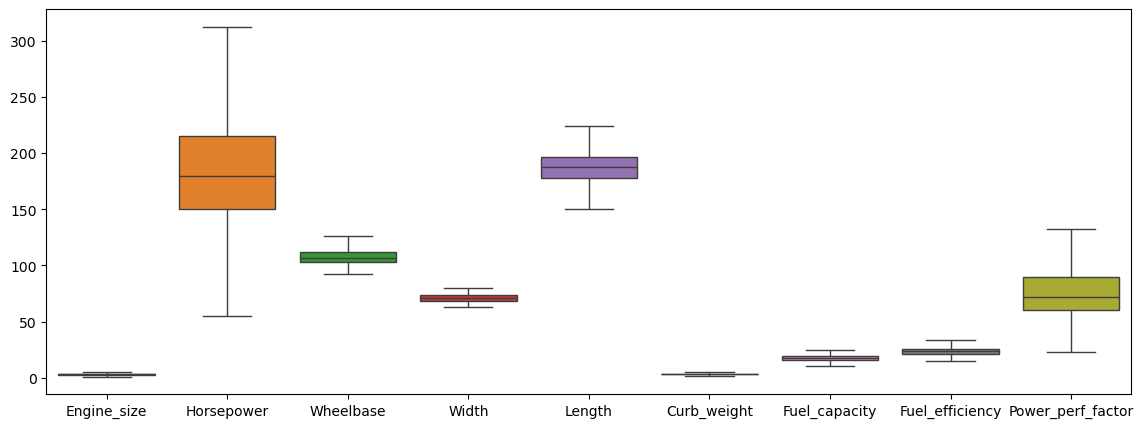

In [27]:
sns.boxplot(data=vhcl_df)
plt.gcf().set_size_inches(14,5)
plt.show()

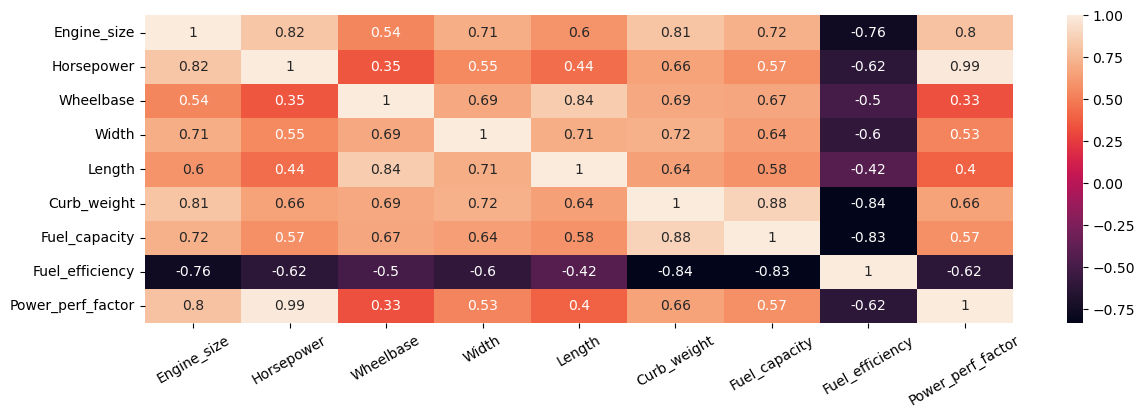

In [29]:
#c) fetaure selection
sns.heatmap(vhcl_df.corr(),annot=True)
plt.gcf().set_size_inches(14,4)
plt.xticks(rotation=30)
plt.show()

In [31]:
cr=abs(vhcl_df.corr()>0.85)
cr.style.background_gradient(cmap='coolwarm')

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Engine_size,True,False,False,False,False,False,False,False,False
Horsepower,False,True,False,False,False,False,False,False,True
Wheelbase,False,False,True,False,False,False,False,False,False
Width,False,False,False,True,False,False,False,False,False
Length,False,False,False,False,True,False,False,False,False
Curb_weight,False,False,False,False,False,True,True,False,False
Fuel_capacity,False,False,False,False,False,True,True,False,False
Fuel_efficiency,False,False,False,False,False,False,False,True,False
Power_perf_factor,False,True,False,False,False,False,False,False,True


In [33]:
# dropping the columns: since both columns has correlation above 0.85
vhcl_df=vhcl_df.drop(['Fuel_capacity','Power_perf_factor'],axis=1)

In [35]:
# d) data scaling
col = vhcl_df.columns
scale=StandardScaler()
df_scl=scale.fit_transform(vhcl_df)
df_scaled=pd.DataFrame(df_scl,columns=col)
df_scaled

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_efficiency
0,-1.286724,-0.852221,-0.878521,-1.122510,-1.121607,-1.226153,1.070331
1,0.168414,0.762340,0.117309,-0.247827,0.417403,0.250315,0.311068
2,0.168414,0.762340,-0.055879,-0.160359,0.349837,0.171279,0.564156
3,0.480229,0.477418,1.055409,0.072890,0.695176,0.810297,-0.448195
4,-1.286724,-0.662272,-0.676468,-0.860105,-0.701195,-0.622449,0.817243
...,...,...,...,...,...,...,...
152,-1.182785,-0.472324,-0.979547,-1.035041,-0.806298,-0.548457,0.311068
153,-0.663093,-0.320365,-0.344525,-0.539388,-0.108113,-0.269307,0.311068
154,-0.663093,-0.320365,-0.344525,-0.539388,-0.085590,-0.183544,0.311068
155,-0.767032,0.971284,-0.344525,0.102046,-0.123127,0.391572,-0.195107


### Task2: Optimum k value

In [43]:
# checking model for 2 culsters
km=KMeans(n_clusters=2)
km.fit(df_scaled)

KMeans(n_clusters=2)

In [47]:
km_cntrd=km.cluster_centers_
km_cntrd

array([[-0.78724197, -0.6788928 , -0.71936439, -0.77263644, -0.71594867,
        -0.81947934,  0.6467606 ],
       [ 0.66684026,  0.57506214,  0.60934395,  0.65446851,  0.60645064,
         0.69414721, -0.54784427]])

In [49]:
label=km.labels_
label

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1])

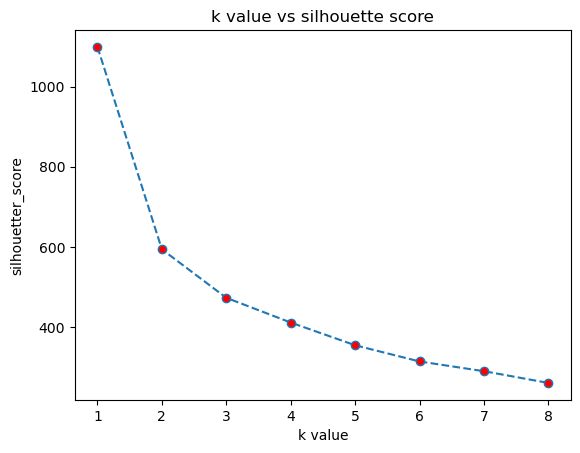

In [51]:
# a) elbow plot
distortion=[]
for i in range(1,9):
    kmean=KMeans(n_clusters=i)
    kmean.fit(df_scaled)
    distortion.append(kmean.inertia_)

plt.plot(range(1,9),distortion,linestyle='--',marker='o',markerfacecolor='red')
plt.xlabel('k value')
plt.ylabel('silhouetter_score')
plt.title('k value vs silhouette score') 
plt.show()


For n_cluster= 2 average silhouette score: 0.37413516535081065
For n_cluster= 3 average silhouette score: 0.3096477438579057
For n_cluster= 4 average silhouette score: 0.2343285950173752
For n_cluster= 5 average silhouette score: 0.24880210441602404
For n_cluster= 6 average silhouette score: 0.24051561985081002
For n_cluster= 7 average silhouette score: 0.26900161054081895
For n_cluster= 8 average silhouette score: 0.28062924522169813
For n_cluster= 9 average silhouette score: 0.246101152860042
For n_cluster= 10 average silhouette score: 0.2553618390899499


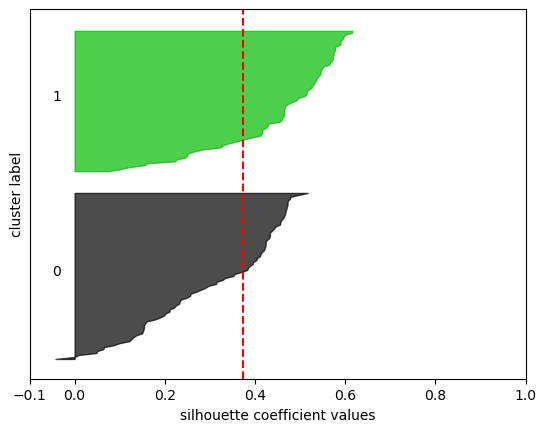

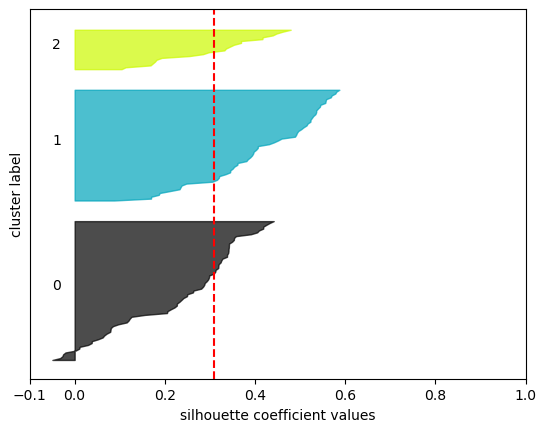

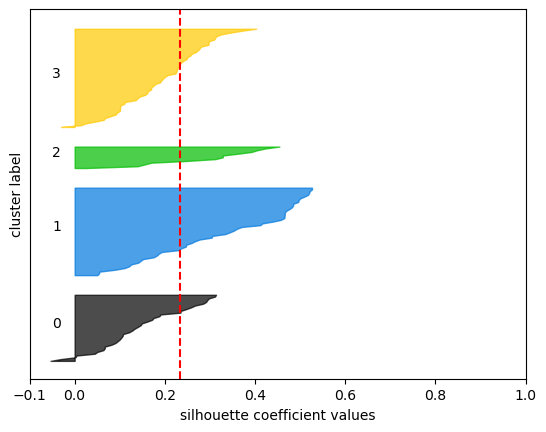

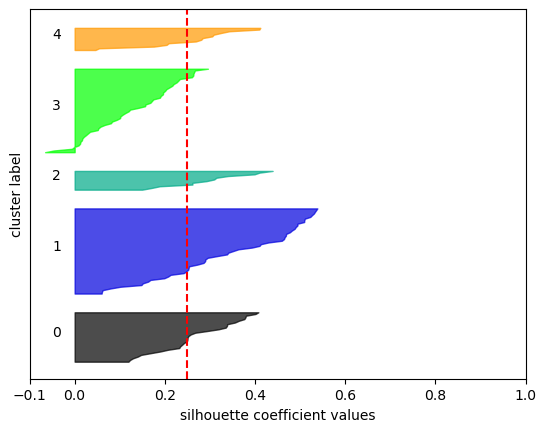

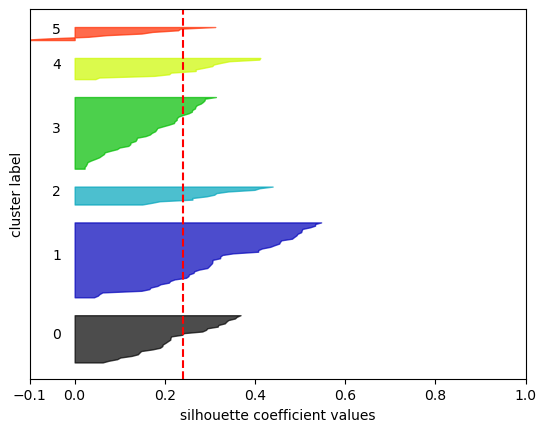

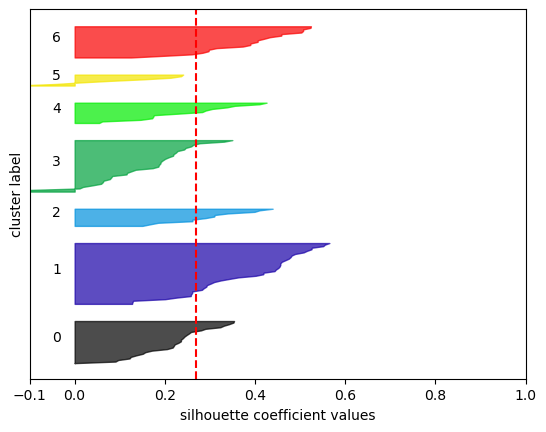

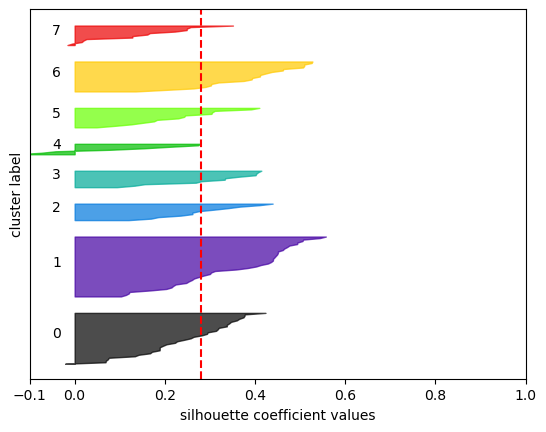

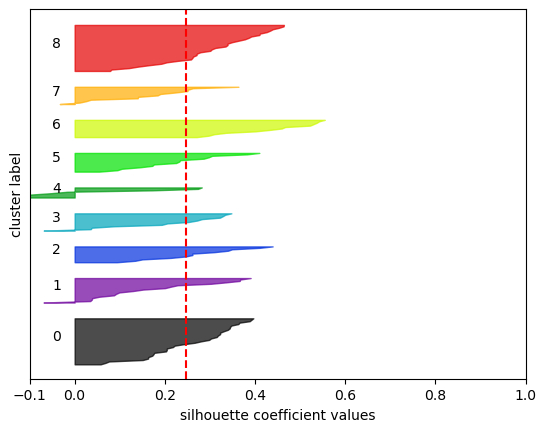

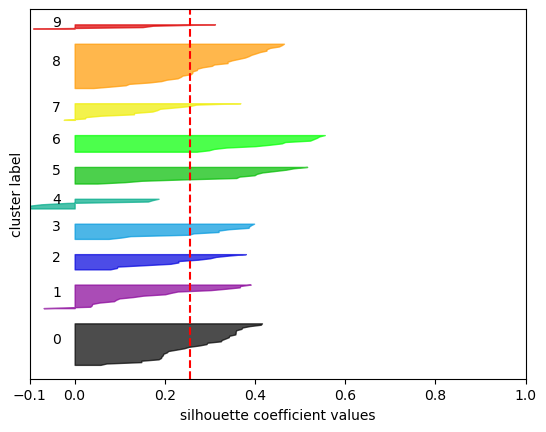

In [53]:
# b) silhouette
X=df_scaled
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for n_cluster in range_n_clusters:
    figure,ax1=plt.subplots(1,1)
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0,len(X)+(n_cluster+1)*10])
    cluster=KMeans(n_clusters=n_cluster,random_state=10)
    cluster_label=cluster.fit_predict(X)
    silhouette_avg=silhouette_score(X,cluster_label)
    print('For n_cluster=',n_cluster,'average silhouette score:',silhouette_avg)
    # compute silhouette score for each sample
    sample_silht_values=silhouette_samples(X,cluster_label)
    y_lower=10
    for i in range(n_cluster):
        ith_cluster_silht_values=sample_silht_values[cluster_label==i]
        ith_cluster_silht_values=np.sort(ith_cluster_silht_values)
        size_cluster_i=ith_cluster_silht_values.shape[0]
        y_upper=y_lower+size_cluster_i
        color=cm.nipy_spectral(float(i)/n_cluster)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silht_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i))
        # compute the new y_lower for next plot
        y_lower=y_upper+10
    ax1.set_xlabel('silhouette coefficient values')
    ax1.set_ylabel('cluster label')
    # vertical line for avg slht score for all values
    ax1.axvline(x=silhouette_avg,c='r',ls='--')
    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
plt.show()

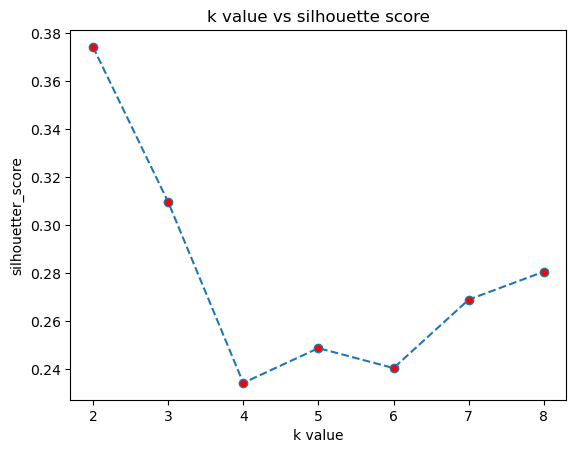

In [55]:
# c) silhoutte score
slht_score=[]
for i in range(2,9):
    slht_score.append(silhouette_score(df_scaled,KMeans(n_clusters=i,random_state=10).fit_predict(df_scaled)))
plt.plot(range(2,9),slht_score,linestyle='--',marker='o',markerfacecolor='red')
plt.xlabel('k value')
plt.ylabel('silhouetter_score')
plt.title('k value vs silhouette score') 
plt.show()

### Task3

In [57]:
# a) K means algorithm
# Build the model
kmean_model=KMeans(n_clusters=2,random_state=10)
# Fitting the dataset
kmean_model.fit(df_scaled)

KMeans(n_clusters=2, random_state=10)

In [59]:
# centre of clusters
kmean_cntrd=kmean_model.cluster_centers_
kmean_cntrd

array([[ 0.66684026,  0.57506214,  0.60934395,  0.65446851,  0.60645064,
         0.69414721, -0.54784427],
       [-0.78724197, -0.6788928 , -0.71936439, -0.77263644, -0.71594867,
        -0.81947934,  0.6467606 ]])

In [61]:
# clusters each data point belongs to
kmean_label2=kmean_model.labels_
kmean_label2

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0])

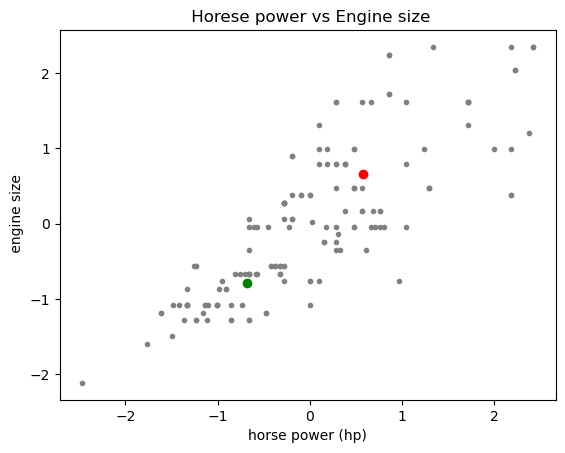

In [101]:
# b) scatter plot for Horsepower and Engine size
plt.scatter(df_scaled['Horsepower'],df_scaled['Engine_size'],color='grey',marker='.')
plt.scatter(0.57506214,0.66684026,marker='o',color='red')
plt.scatter(-0.6788928,-0.78724197,marker='o',color='green')
plt.xlabel('horse power (hp)')
plt.ylabel(' engine size')
plt.title(' Horese power vs Engine size')
plt.show()

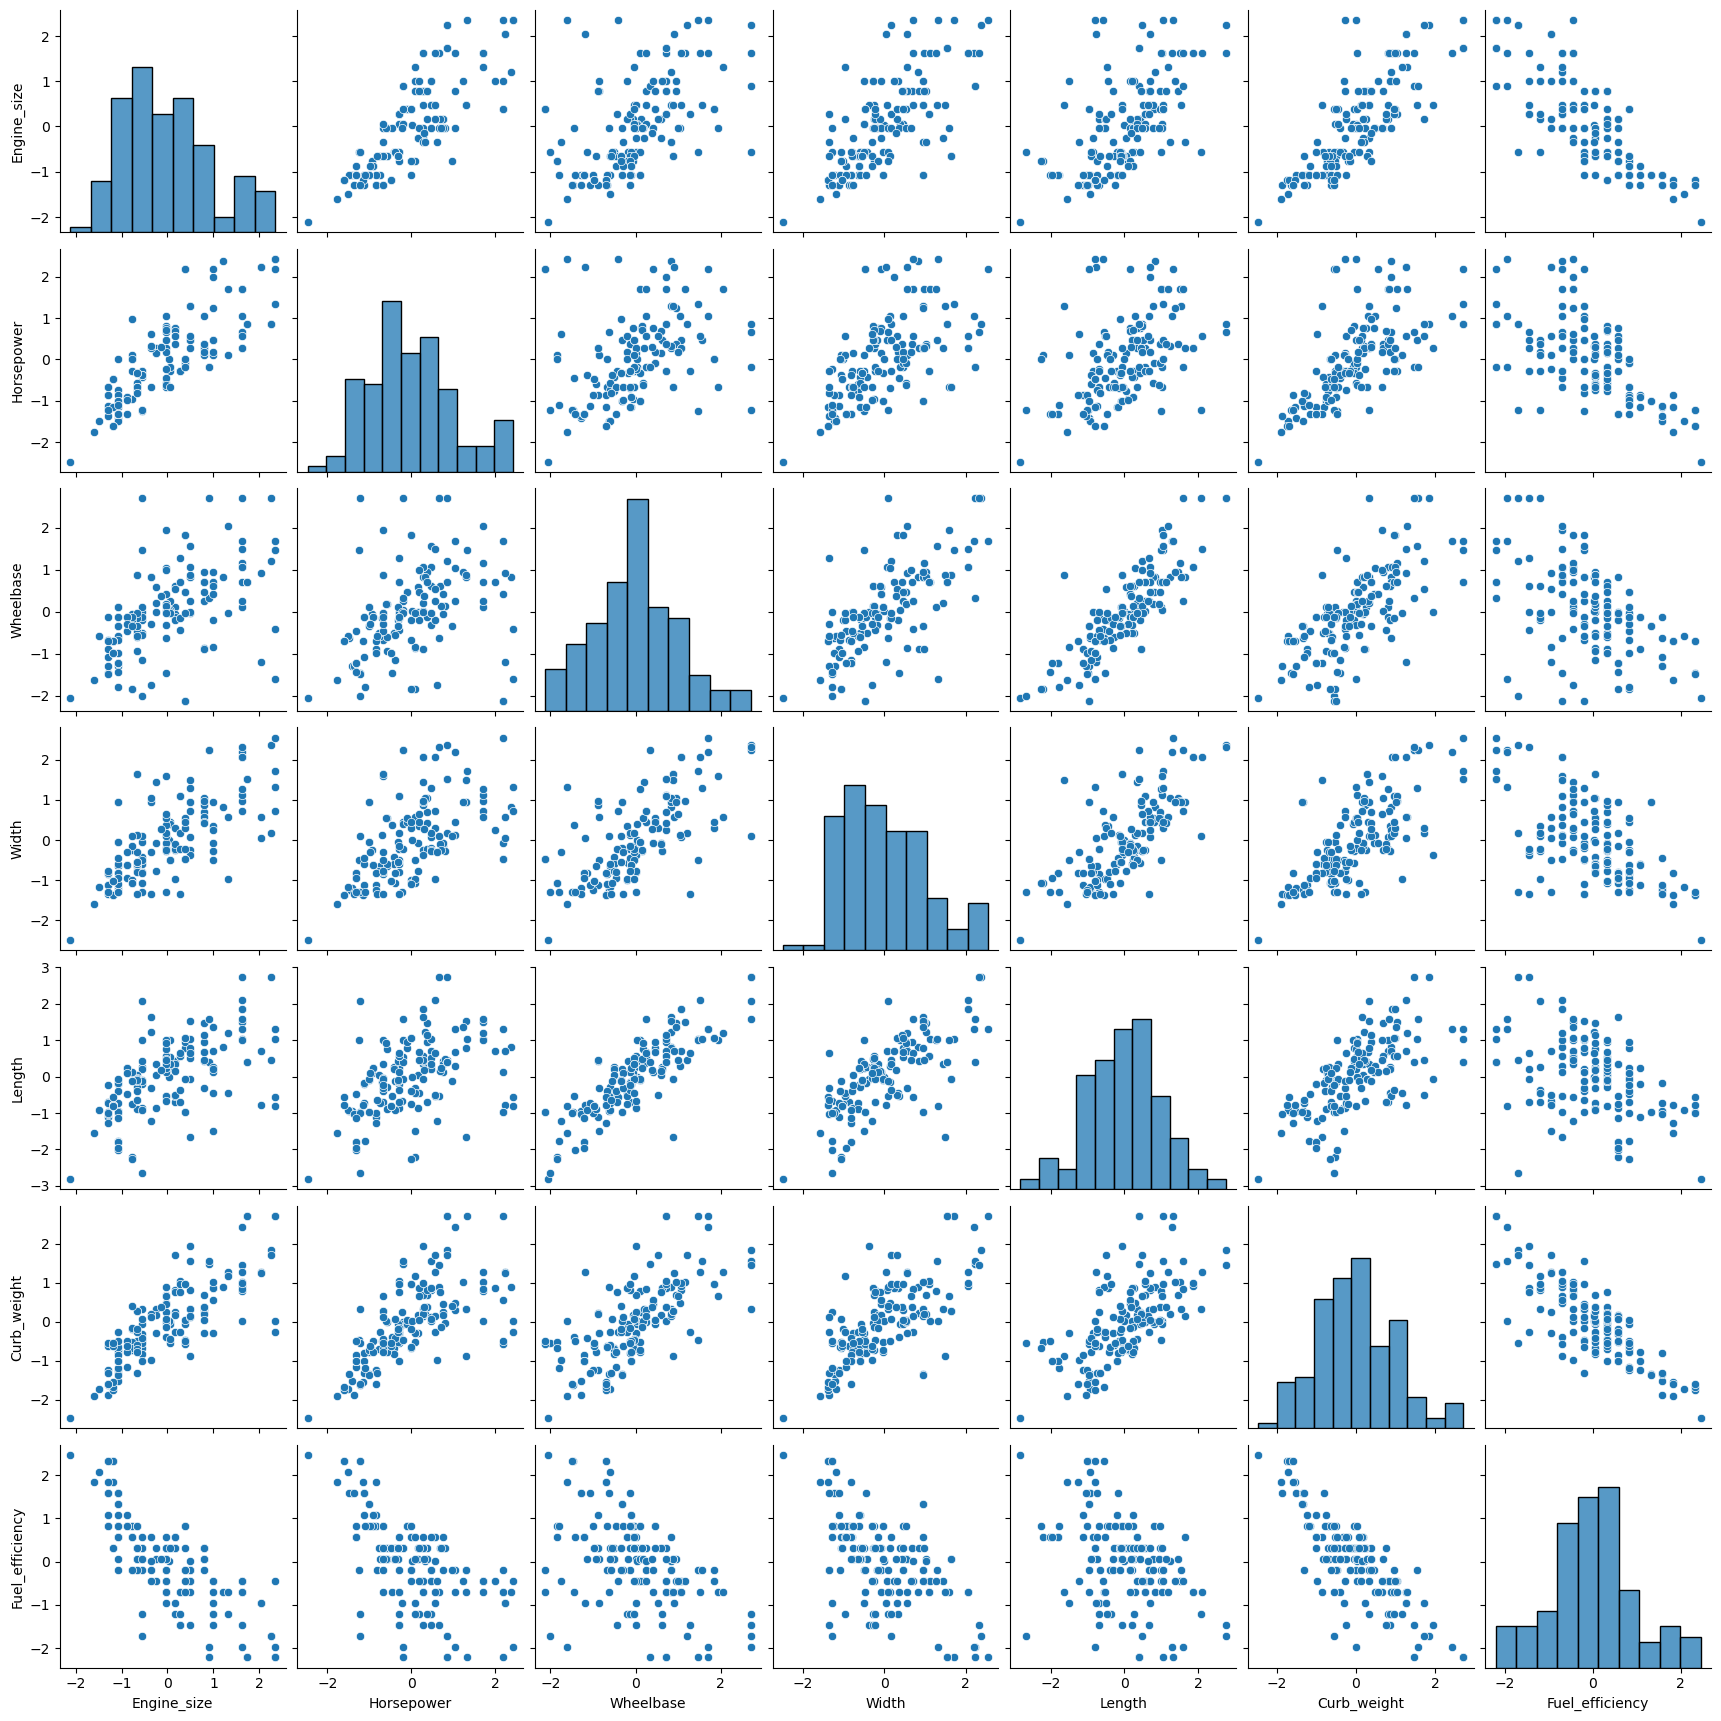

In [99]:
# c) pair plot for all numerical columns
sns.pairplot(data=df_scaled,kind='scatter')
plt.show()

In [67]:
lbl_df=pd.DataFrame({'label':kmean_label2})
lbl_df

,label
0,1
1,0
2,0
3,0
4,1
...,...
152,1
153,1
154,1
155,0


In [71]:
df=pd.concat([veh_df,lbl_df],axis=1)
df

,Manufacturer,Model,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,label
0,Acura,Integra,Passenger,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150,1
1,Acura,TL,Passenger,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778,0
2,Acura,CL,Passenger,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN,0
3,Acura,RL,Passenger,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779,0
4,Audi,A4,Passenger,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,Passenger,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812,1
153,Volvo,S70,Passenger,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495,1
154,Volvo,V70,Passenger,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978,1
155,Volvo,C70,Passenger,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357,0


In [73]:
# cluster wise unique car model
cluster=df.groupby('label')['Model'].unique()
cluster

label
0    [TL, CL, RL, A6, A8, 528i, Century, Regal, Par...
1    [Integra, A4, 323i, 328i, Cavalier, Malibu, Pr...
Name: Model, dtype: object

### Task4

In [300]:
# a) Evaluation
ch_index=calinski_harabasz_score(df_scaled,kmean_label2)
ch_index

131.7887640541023

In [302]:
db_index=davies_bouldin_score(df_scaled,kmean_label2)
db_index

0.979019427442689

In [304]:
Silhouette_score=silhouette_score(df_scaled,kmean_model.fit_predict(df_scaled))
Silhouette_score

0.37413516535081065

In [ ]:
# b) Interpretation:
The Calinski harabasz index of 131.78 that the model is moderately seperated and the cluster isnt ideal
Davies bouldin score is almost 1 which indicates clusters are less distict or more similar to each other
silhouette score of 0.37 indicates that the clusters might be overlapping or the points are on the multiple boundaries
The model in overall is performing poorly, but not the worst one. The points arent clustered perfectly.